# Assignment -  Data Analytics Process and Interpretation
### **Business Domain -** Telecommunications
### **Dataset -** Telco Customer Churn (Kaggle)
### **Analytical Goal -** To identify the key drivers of customer attrition and provide data-driven recommendations to reduce the churn rate.

## 1. Initial Setup and Data Ingestion
We begin by importing the necessary libraries for data manipulation, statistical testing, and visualization.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### 1.1 Visual styling

In [14]:
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
pd.set_option('display.max_columns', None)

### 1.2 Import data

In [15]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Telco-Customer-Churn.csv"
df = pd.read_csv(path)

print("Data loaded successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully.


## 2. Data Cleaning & Type Formatting
 Before analysis, we must handle structural issues. 'TotalCharges' contains 11 empty strings for customers with 0 tenure. We convert these to 0.0.

In [16]:
# Drop the CustomerID
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
missing_val_count = df['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges: {missing_val_count} \n")

# Impute missing values with 0 (consistent with 0 tenure)
df['TotalCharges'].fillna(0, inplace=True)

# Verify Types
df.info()


Missing values in TotalCharges: 11 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  Payme

/tmp/ipython-input-692338944.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [17]:
# Converting Categorical Features to Numerical Indexes

df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0})

replace_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn']
for i in replace_cols:
    df[i] = df[i].replace({'No internet service': 0})
    df[i] = df[i].replace({'No phone service': 0})

    df[i] = df[i].replace({'No': 0})
    df[i] = df[i].replace({'Yes': 1})

/tmp/ipython-input-2487684341.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0})
/tmp/ipython-input-2487684341.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace({'Yes': 1})


In [18]:
# Save a copy of the data to be used for other graphs.
df_original_multicats = df[['InternetService','Contract','PaymentMethod']]

# One-hot encoding of classification features for multiple classification scenarios
df = pd.get_dummies(df)

## 3. EDA: Summary Statistics

In [19]:
# Get the dataset shape and dimentions
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns \n")

# Get the information of the dataset with column's data types
df.info()

# Initial inspection
df.head()

# Numerical Summary
print("\nNumerical Summary:")
display(df.describe())

# Categorical Summary (Frequency counts for key columns)
print("\nCategorical Distributions:")
for col in df_original_multicats.columns:
    print(f"\n--- {col} ---")
    print(df_original_multicats[col].value_counts(normalize=True) * 100)

Shape: 7043 rows, 27 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport      

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000



Categorical Distributions:

--- InternetService ---
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

--- Contract ---
Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64

--- PaymentMethod ---
PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64


In [20]:
# 1. Shape of the Data (Skewness & Kurtosis)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("Distribution Shape (Skewness & Kurtosis)")
print(df[numerical_cols].agg(['skew', 'kurtosis']))

# 2. The Churner Profile vs. Retained Profile
print("\nStatistical Profile - Churn vs. Non-Churn")
churn_summary = df.groupby('Churn')[numerical_cols].agg(['mean', 'median', 'std'])
display(churn_summary)

# 3. Outlier Detection (using IQR Method)
# Identifying extreme values in Monthly Charges
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]
print(f"\nOutlier Detection")
print(f"Monthly Charges Outliers Detected - {len(outliers)}")
print(f"IQR Thresholds - < {lower_bound:.2f} or > {upper_bound:.2f}")

Distribution Shape (Skewness & Kurtosis)
            tenure  MonthlyCharges  TotalCharges
skew      0.239540       -0.220524      0.963235
kurtosis -1.387372       -1.257260     -0.228580

Statistical Profile - Churn vs. Non-Churn


tenure                   MonthlyCharges                     \
            mean median        std           mean  median        std   
Churn                                                                  
0      37.569965   38.0  24.113777      61.265124  64.425  31.092648   
1      17.979133   10.0  19.531123      74.441332  79.650  24.666053   

      TotalCharges                         
              mean    median          std  
Churn                                      
0      2549.911442  1679.525  2329.954215  
1      1531.796094   703.550  1890.822994


Outlier Detection
Monthly Charges Outliers Detected - 0
IQR Thresholds - < -46.02 or > 171.38


### 3.1 EDA - Categorical Variables

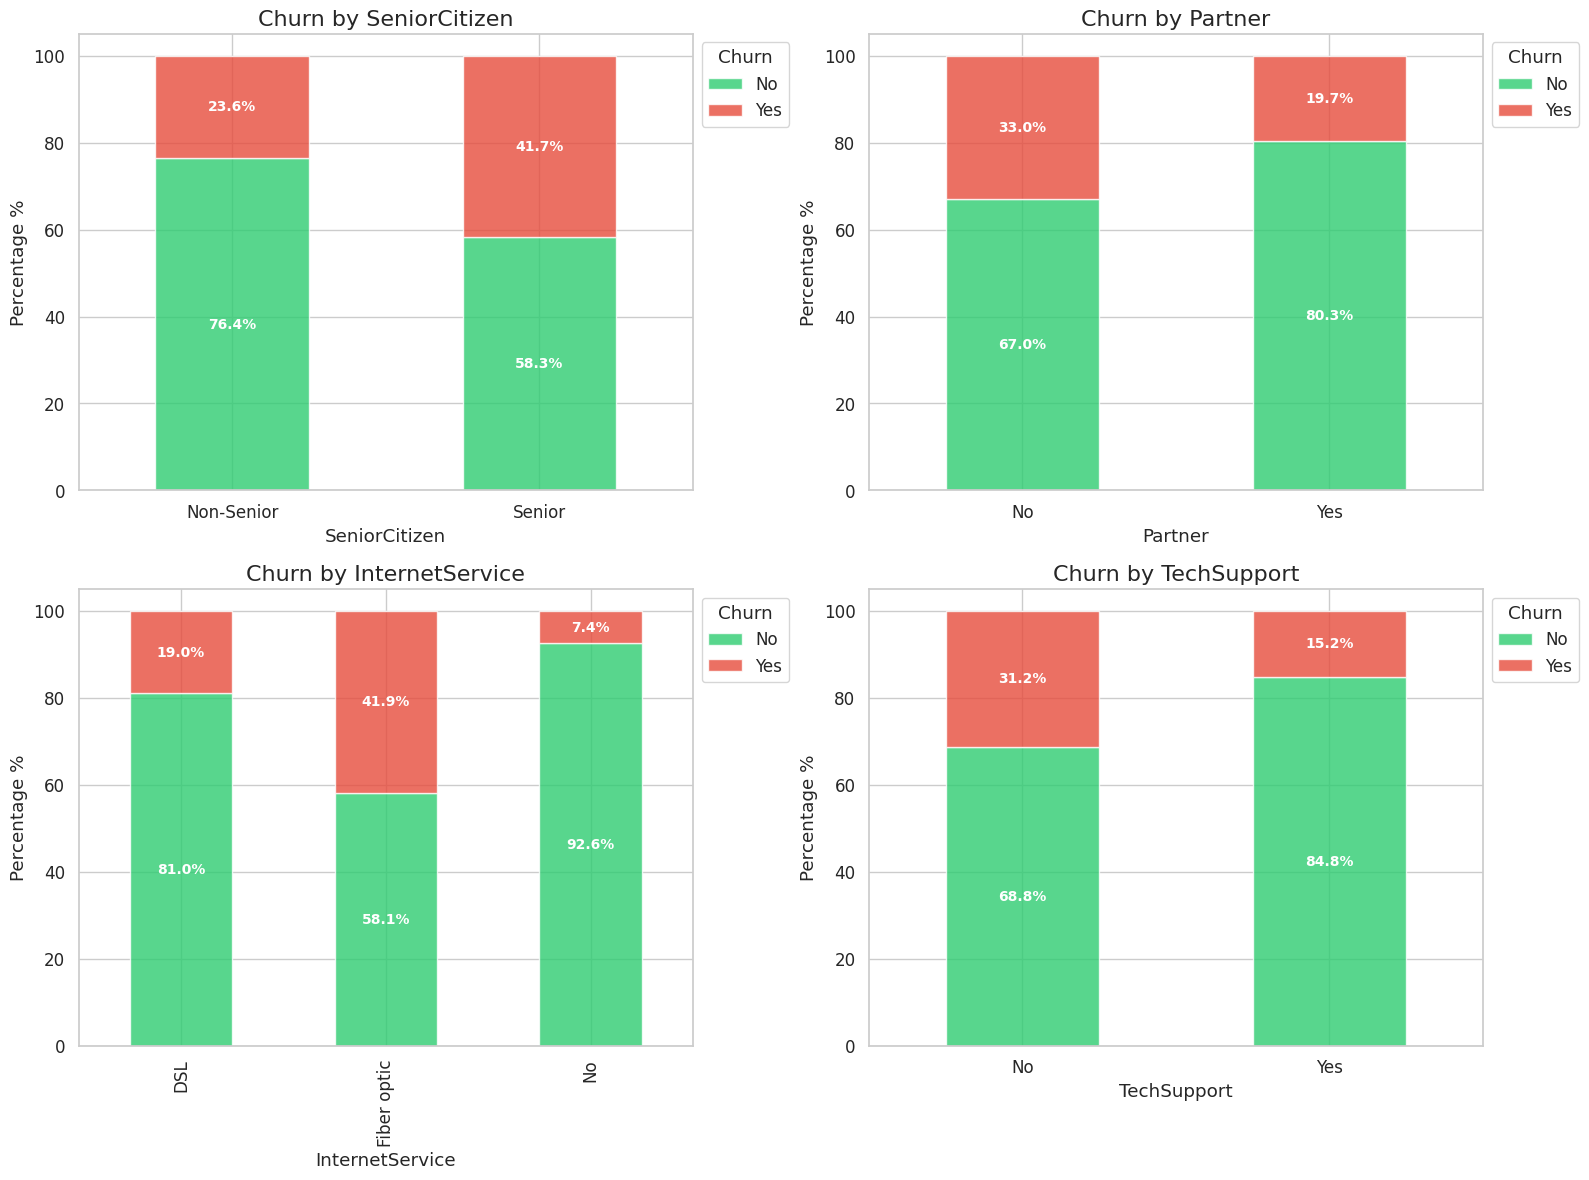

In [21]:
def plot_churn_rate(feature, ax, data_source):
    # 1. Create the cross-tabulation using the passed data_source
    # We use 'Churn' from the same source to ensure the rows match perfectly
    temp = pd.crosstab(data_source[feature], df['Churn'], normalize='index') * 100

    # 2. Plot stacked bar
    temp.plot(kind='bar', stacked=True, ax=ax, color=['#2ecc71', '#e74c3c'], alpha=0.8)

    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=10, color='white', fontweight='bold')

    ax.set_title(f'Churn by {feature}')
    ax.set_ylabel('Percentage %')
    ax.legend(title='Churn', labels=['No', 'Yes'], loc='upper right',bbox_to_anchor=(1.17, 1))

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Senior Citizen Impact
plot_churn_rate('SeniorCitizen', axes[0, 0], df)
axes[0, 0].set_xticklabels(['Non-Senior', 'Senior'], rotation=0)

# Partner Status
plot_churn_rate('Partner', axes[0, 1], df)
axes[0, 1].set_xticklabels(['No', 'Yes'], rotation=0)

# Internet Service Type
plot_churn_rate('InternetService', axes[1, 0], df_original_multicats)

# Tech Support (Value-Added Service)
plot_churn_rate('TechSupport', axes[1, 1], df)
axes[1, 1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

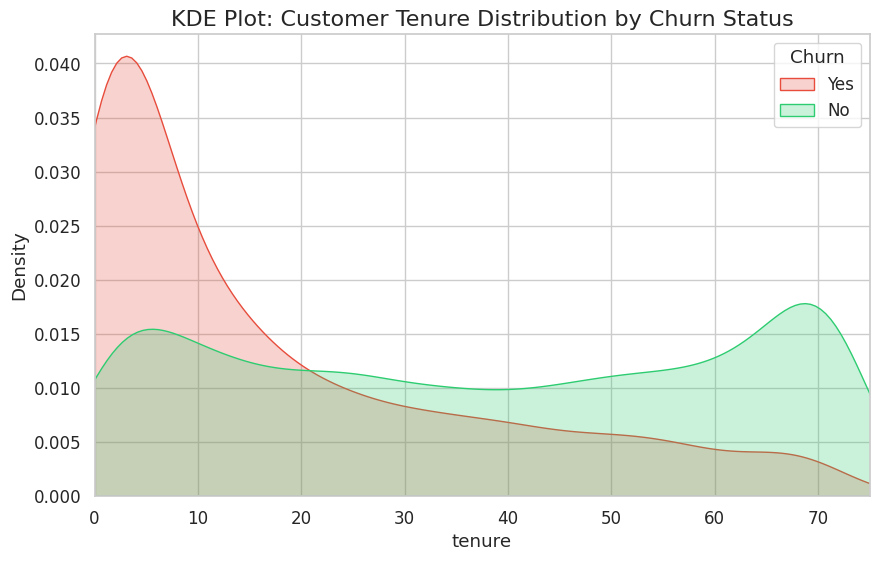

In [22]:
# Distribution of Tenure (Customer Lifecycle)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette={0: '#2ecc71', 1: '#e74c3c'})
plt.title('KDE Plot: Customer Tenure Distribution by Churn Status')
plt.legend(title='Churn', labels=['Yes', 'No'], loc='upper right')
plt.xlim(0, 75)
plt.show()


### 3.2 EDA - Multivariate Analysis

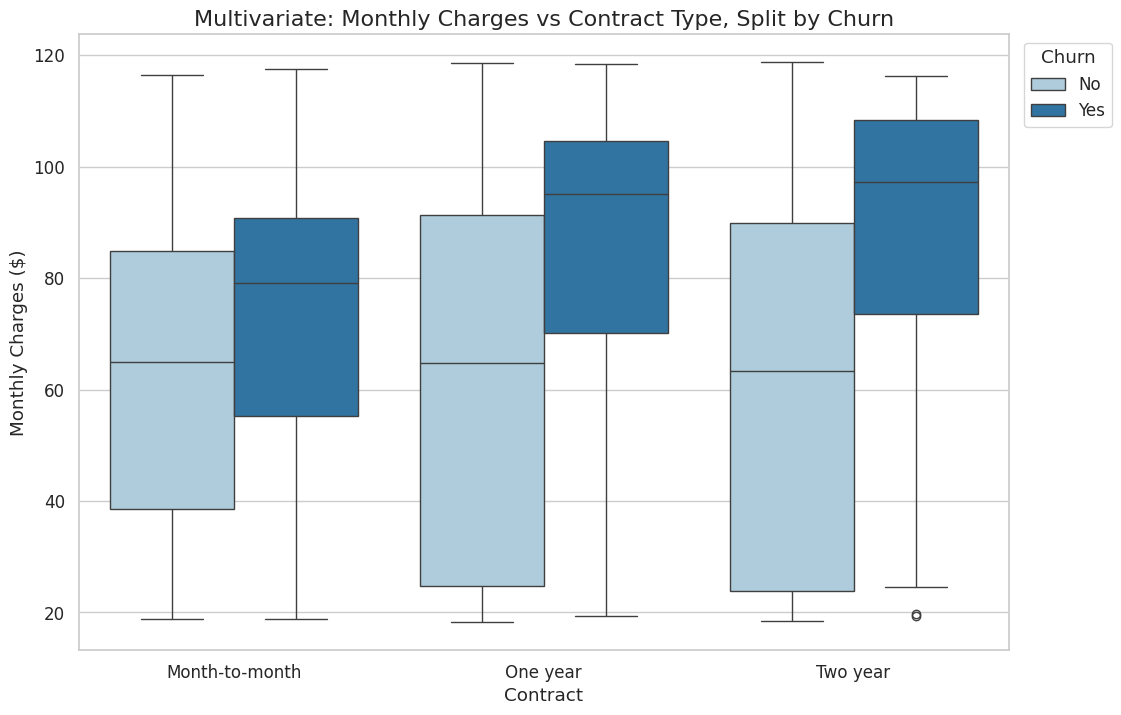

In [23]:
plot_df = df[['MonthlyCharges', 'Churn']].copy()
plot_df['Contract'] = df_original_multicats['Contract']

# Plotting using the combined dataframe
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=plot_df, palette='Paired')
plt.title('Multivariate: Monthly Charges vs Contract Type, Split by Churn')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Churn', loc='upper right', bbox_to_anchor=(1.12, 1))
plt.ylabel('Monthly Charges ($)')
plt.show()

### 3.3 Interactive Multivariate Analysis

In [24]:
import plotly.express as px

# 1. Prepare data (Ensure labels are readable strings, not numbers)
sunburst_df = df.copy()
sunburst_df['Contract'] = df_original_multicats['Contract']
sunburst_df['InternetService'] = df_original_multicats['InternetService']
sunburst_df['PaymentMethod'] = df_original_multicats['PaymentMethod']

# Map back to text if you already encoded them (skip if they are already text)
# It's safer to map them to be sure the chart looks good
if pd.api.types.is_numeric_dtype(sunburst_df['Contract']):
    sunburst_df['Contract'] = sunburst_df['Contract'].map({0: 'Month-to-month', 1: 'One Year', 2: 'Two Year'})
if pd.api.types.is_numeric_dtype(sunburst_df['InternetService']):
    sunburst_df['InternetService'] = sunburst_df['InternetService'].map({0: 'No Internet', 1: 'DSL', 2: 'Fiber Optic'})
if pd.api.types.is_numeric_dtype(sunburst_df['Churn']):
    sunburst_df['Churn'] = sunburst_df['Churn'].map({1: 'Churn: Yes', 0: 'Churn: No'})

# 2. Create the Sunburst Chart
# Path: The order of the rings (Inner -> Outer)
fig = px.sunburst(sunburst_df,
                  path=['Contract', 'InternetService', 'Churn'],
                  color='Churn',
                  color_discrete_map={'Churn: Yes': '#EF553B', 'Churn: No': '#00CC96'},
                  title="<b>Churn Hierarchy:</b> Click any section to zoom in",
                  width=800, height=800)

fig.update_traces(textinfo="label+percent entry")
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))

fig.show()

## 4. Statistical Analysis

### 4.1 Correlation Matrix

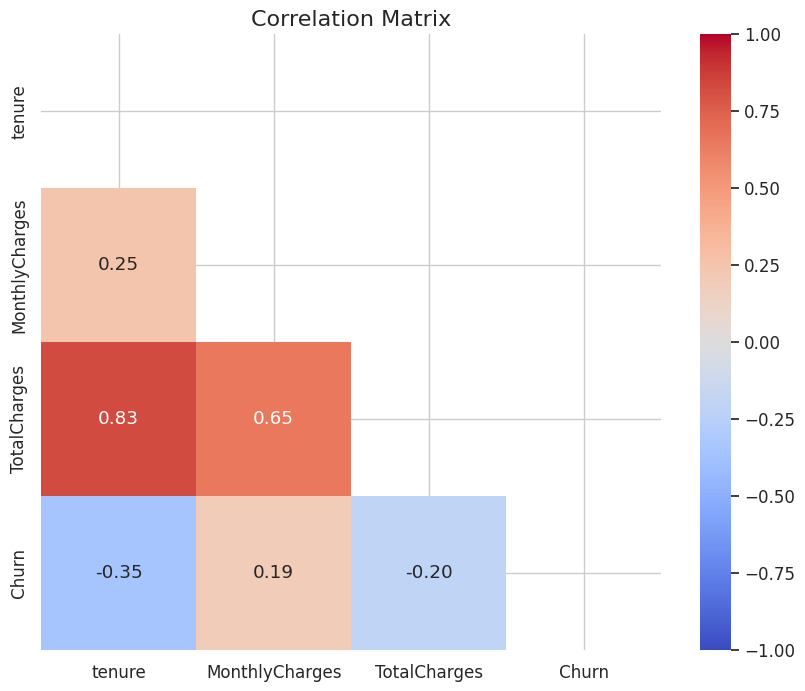

In [25]:
# A. Correlation Matrix
plt.figure(figsize=(10, 8))
# Select only numerical columns including the binary churn
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

# Mask the upper triangle for cleaner visualization
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 4.2 Chi-Square Test

In [26]:
# Chi-Square Test of Independence
# Null Hypothesis (H0): There is NO relationship between the feature and Churn.
# Alternative Hypothesis (H1): There IS a relationship.

def run_chi_square(feature):
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    return p

significant_features = []
features_to_test = [col for col in df.columns if col != 'Churn']

print(f"{'Feature':<20} | {'P-Value':<12} | {'Result'}")
print("-" * 45)

for feature in features_to_test:
    p_value = run_chi_square(feature)
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    if p_value < 0.05:
        significant_features.append(feature)
    print(f"{feature:<20} | {p_value:.2e}   | {significance}")

Feature              | P-Value      | Result
---------------------------------------------
gender               | 4.87e-01   | Not Significant
SeniorCitizen        | 1.51e-36   | Significant
Partner              | 2.14e-36   | Significant
Dependents           | 4.92e-43   | Significant
tenure               | 1.28e-176   | Significant
PhoneService         | 3.39e-01   | Not Significant
MultipleLines        | 8.43e-04   | Significant
OnlineSecurity       | 1.23e-46   | Significant
OnlineBackup         | 6.21e-12   | Significant
DeviceProtection     | 3.32e-08   | Significant
TechSupport          | 2.92e-43   | Significant
StreamingTV          | 1.30e-07   | Significant
StreamingMovies      | 3.00e-07   | Significant
PaperlessBilling     | 4.07e-58   | Significant
MonthlyCharges       | 1.89e-18   | Significant
TotalCharges         | 5.53e-01   | Not Significant
InternetService_DSL  | 2.59e-25   | Significant
InternetService_Fiber optic | 4.94e-147   | Significant
InternetService_No   | 2

### 4.3 Visualizing the Correlations

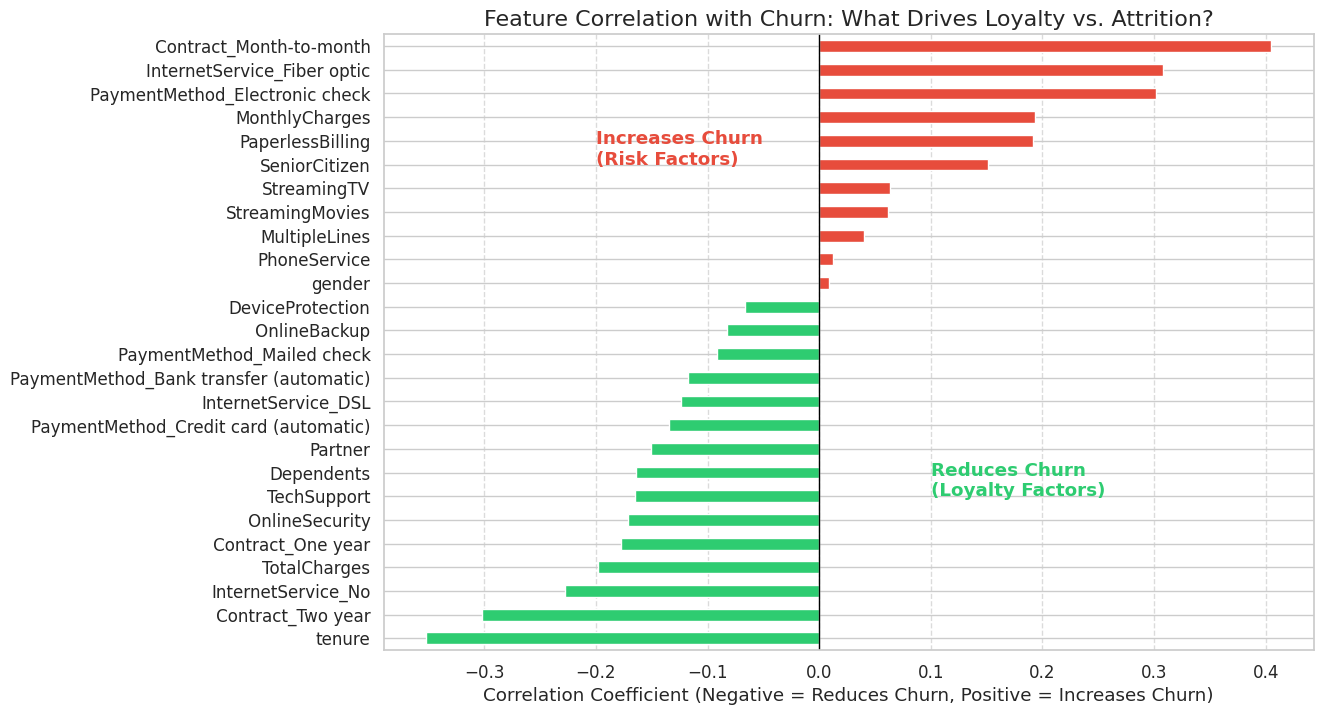

In [27]:
# Calculate correlations with Churn
correlations = df.corr()['Churn'].sort_values()

# Drop 'Churn' itself (perfect correlation of 1.0 is useless info)
correlations = correlations.drop('Churn')

# Create colors based on Positive (Red) or Negative (Green) correlation
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in correlations]

plt.figure(figsize=(12, 8))
correlations.plot(kind='barh', color=colors)

plt.title('Feature Correlation with Churn: What Drives Loyalty vs. Attrition?', fontsize=16)
plt.xlabel('Correlation Coefficient (Negative = Reduces Churn, Positive = Increases Churn)')
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add text labels for clarity
plt.text(-0.2, len(correlations)-6, 'Increases Churn\n(Risk Factors)', color='#e74c3c', fontweight='bold')
plt.text(0.1, 6, 'Reduces Churn\n(Loyalty Factors)', color='#2ecc71', fontweight='bold')

plt.show()